# SVM


In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np

# Load data
data_tr = datasets.MNIST(root="C:/Users/ondra/Python Projects/datasets/MNIST", train=True, download=True, transform=ToTensor())
data_ts = datasets.MNIST(root="C:/Users/ondra/Python Projects/datasets/MNIST", train=False, download=True, transform=ToTensor())

# change the tensor to array

Xtr = np.array(data_tr.data)
ytr = np.array(data_tr.targets)

Xts = np.array(data_ts.data)
yts = np.array(data_ts.targets)

# reshape array into rows

Xtr_rows = Xtr.reshape(60000, 28*28)
Xts_rows = Xts.reshape(10000, 28*28)

def valiSplit(data, percentage):
    # splits input data into train and validation set
    treshold = round(data.shape[0] * percentage)
    trainData = data[:treshold,]
    valiData = data[-(data.shape[0] - treshold):,]
    return trainData, valiData

In [2]:
trainData, valiData = valiSplit(Xtr_rows, 0.85)
trainY, valiY = valiSplit(ytr, 0.85)

In [3]:
from sklearn.svm import LinearSVC

SVC = LinearSVC()
SVC.fit(trainData, trainY)

c:\Users\ondra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [4]:
print(SVC.coef_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
SVC.score(valiData, valiY)

0.8603333333333333

In [8]:
SVC.coef_.shape

(10, 784)

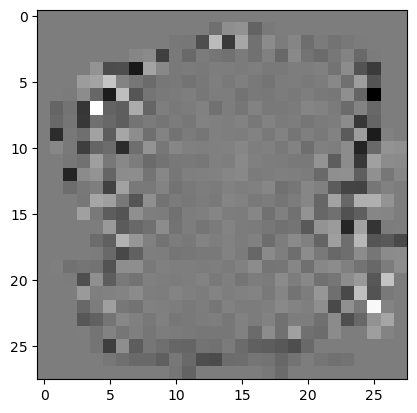

In [16]:
weightZero = SVC.coef_[1].reshape(28,28)

plt.imshow(weightZero, cmap="gray")

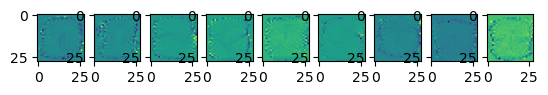

In [15]:
# ploting the weights


f, axarr = plt.subplots(1,9)

for i in range(0, 9):
    img = SVC.coef_[i].reshape(28,28)
    axarr[i].imshow(img)



In [17]:
SVC.score(Xts_rows, yts)

0.8618

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),
                   LinearSVC(random_state=0, tol=1e-5))


In [28]:
clf.fit(trainData, trainY)

c:\Users\ondra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [29]:
clf.named_steps['linearsvc'].score(valiData, valiY)

0.7581111111111111